**Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

Mean Squared Error: 3.4788039706378995
R^2 Score: 0.8489813024899067
Accuracy: 0.8524590163934426
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1-score: 0.9142857142857143


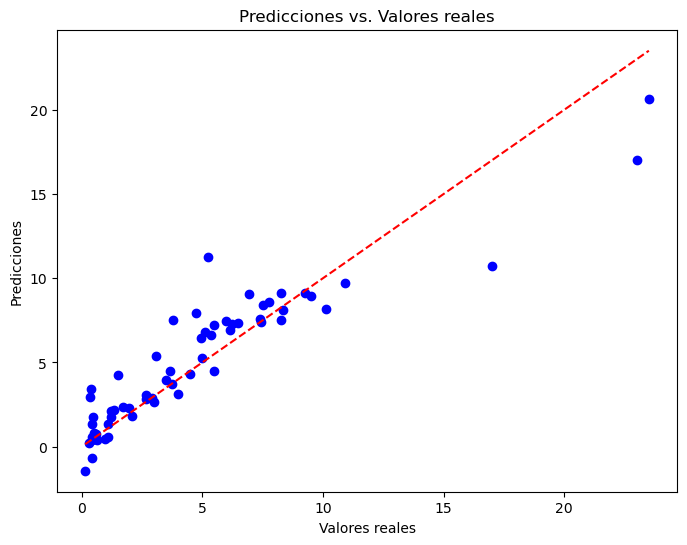

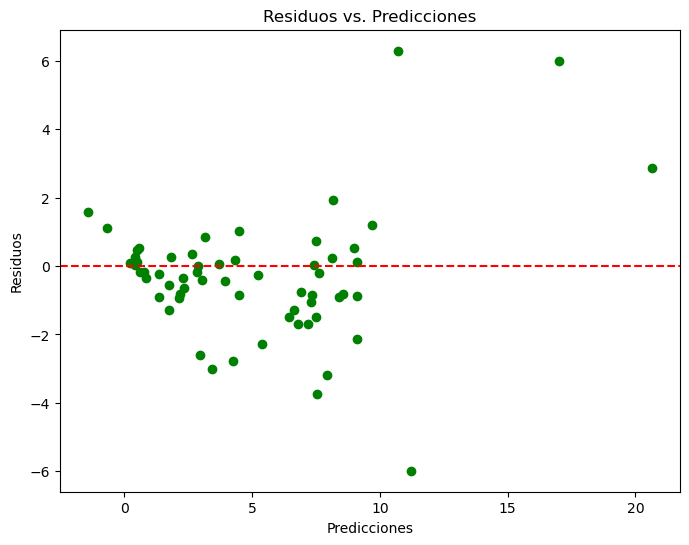

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('car data.csv')

# Identificar y manejar los valores faltantes
data_cleaned = data.dropna()

# Codificar las variables categóricas
data_encoded = pd.get_dummies(data_cleaned, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

# Eliminar la columna 'Car_Name'
data_encoded.drop('Car_Name', axis=1, inplace=True)

# Escalar las características numéricas
scaler = StandardScaler()
numeric_features = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Dividir los datos en características (X) y etiquetas (y)
X = data_encoded.drop('Selling_Price', axis=1)
y = data_encoded['Selling_Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con métricas de regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Definir un umbral para binarizar las predicciones
threshold = 0.5

# Binarizar las predicciones y las etiquetas
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calcular métricas de clasificación
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

# Mostrar métricas de clasificación
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Gráfico de dispersión de las predicciones vs. los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.show()

# Gráfico de residuos
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs. Predicciones')
plt.show()